In [1]:
from interpretable_ml_kit import get_german_credit_data, pdp, pdp_pretty_plot, ice, ice_pretty_plot, ale, ale_pretty_plot
from sklearn.tree import DecisionTreeClassifier

# 0. READ DATA

In [2]:
germanCreditData = get_german_credit_data(file_path="./data/GermanDataset.data")
x = germanCreditData.drop(["creditRisk"], axis=1)
y = germanCreditData["creditRisk"]

In [3]:
print(x.shape)
print(y.shape)

(1000, 53)
(1000,)


# 1. TRAIN THE MODEL

In [4]:
model_fit = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy', 
                                   max_depth=8, max_features='auto', max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, min_impurity_split=None, 
                                   min_samples_leaf=9, min_samples_split=9,
                                   min_weight_fraction_leaf=0.0, 
                                   # presort='deprecated',
                                   random_state=42, splitter='best').fit(x, y)

# 2. PARTIAL DEPENDENCE PLOT (PDP)

### 2.1. Numerical Feature

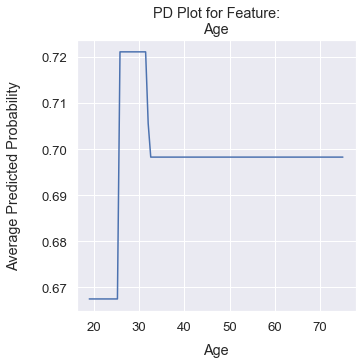

In [5]:
reference_feature = "Age"
pdp_grid, pdp_values, feature_type = pdp(model_fit, x, reference_feature, grid_resolution=100)
pdp_pretty_plot(pdp_grid, pdp_values, reference_feature, feature_type, fig_size=[5, 5])

### 2.2. Categorical Feature: One-Hot Encoded 

In [6]:
# One-hot encoded features should be represented as a python list
reference_feature = [s for s in x.columns if s.startswith('creditHistory')]
reference_feature

['creditHistory_A30',
 'creditHistory_A31',
 'creditHistory_A32',
 'creditHistory_A33',
 'creditHistory_A34']

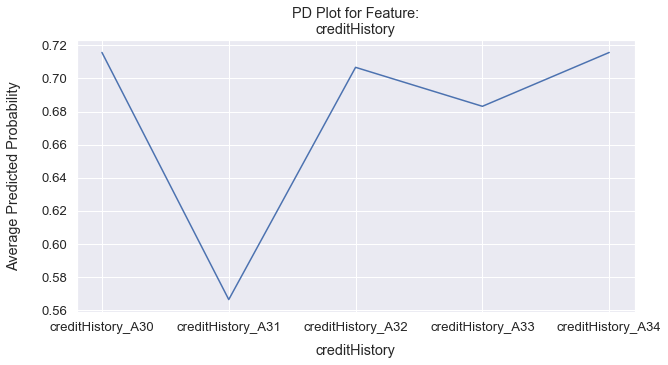

In [7]:
pdp_grid, pdp_values, feature_type = pdp(model_fit, x, reference_feature)
pdp_pretty_plot(pdp_grid, pdp_values, reference_feature, feature_type)

### 2.3. Categorical Feature: Binary

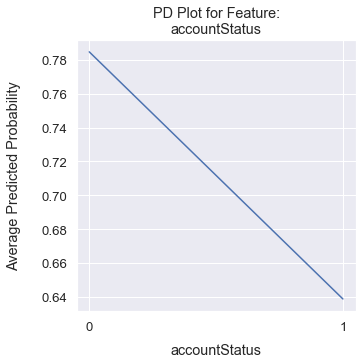

In [8]:
reference_feature = "accountStatus_1"
pdp_grid, pdp_values, feature_type = pdp(model_fit, x, reference_feature)
pdp_pretty_plot(pdp_grid, pdp_values, reference_feature, feature_type, fig_size=[5, 5])

# 3. INDIVIDUAL CONDITIONAL EXPECTATION (ICE)

### 3.1. Numerical Feature

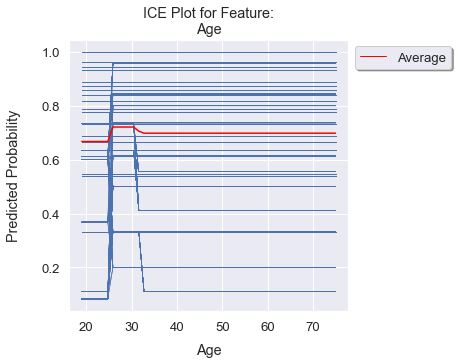

In [9]:
reference_feature = "Age"
ice_grid, ice_values, feature_type = ice(model_fit, x, reference_feature, grid_resolution=50)
ice_pretty_plot(ice_grid, ice_values, reference_feature, feature_type, fig_size=[5, 5])

### 3.2. Categorical Feature: One-Hot Encoded

In [10]:
# One-hot encoded features should be represented as a python list
reference_feature = [s for s in x.columns if s.startswith('creditHistory')]
reference_feature

['creditHistory_A30',
 'creditHistory_A31',
 'creditHistory_A32',
 'creditHistory_A33',
 'creditHistory_A34']

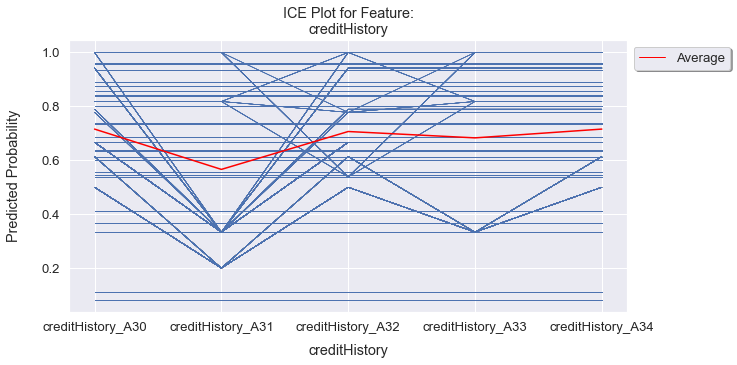

In [11]:
ice_grid, ice_values, feature_type = ice(model_fit, x, reference_feature)
ice_pretty_plot(ice_grid, ice_values, reference_feature, feature_type, fig_size=[10, 5])

### 3.3. Categorical Feature: Binary

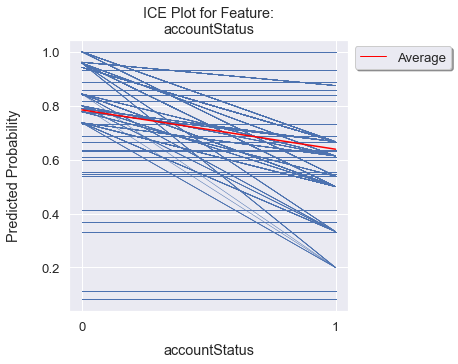

In [12]:
reference_feature = "accountStatus_1"
ice_grid, ice_values, feature_type = ice(model_fit, x, reference_feature)
ice_pretty_plot(ice_grid, ice_values, reference_feature, feature_type, fig_size=[5, 5])

# 4. ACCUMULATED LOCAL EFFECTS (ALE)

### 4.1. Numerical Feature

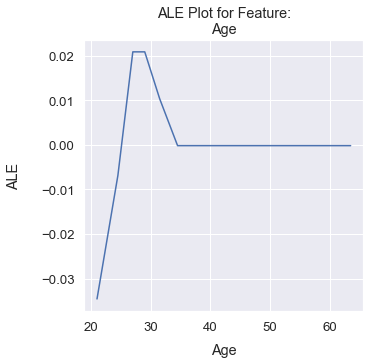

In [13]:
reference_feature = "Age"
ale_grid, ale_values, feature_type = ale(model_fit, x, reference_feature)
ale_pretty_plot(ale_grid, ale_values, reference_feature, feature_type, fig_size=[5,5])

### 4.2. Categorical Feature: One-Hot Encoded

In [14]:
# One-hot encoded features should be represented as a python list
reference_feature = [s for s in x.columns if s.startswith('creditHistory')]
reference_feature

['creditHistory_A30',
 'creditHistory_A31',
 'creditHistory_A32',
 'creditHistory_A33',
 'creditHistory_A34']

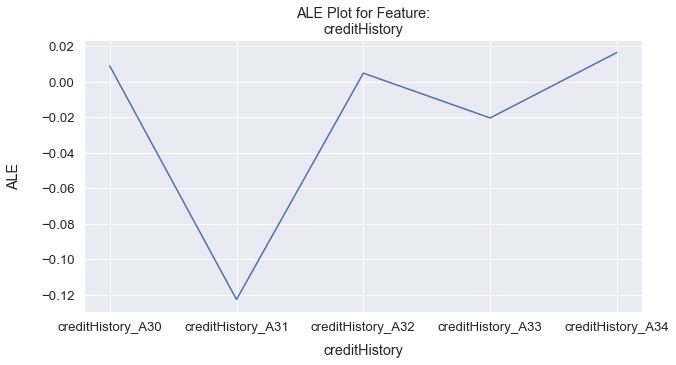

In [15]:
ale_grid, ale_values, feature_type = ale(model_fit, x, reference_feature)
ale_pretty_plot(ale_grid, ale_values, reference_feature, feature_type)

### 4.3. Categorical Feature: Binary

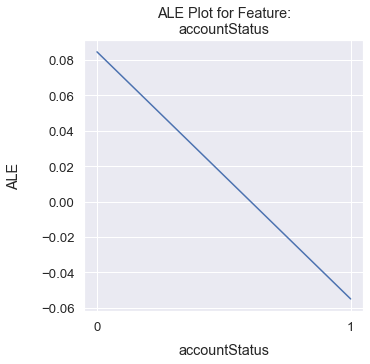

In [16]:
reference_feature = "accountStatus_1"
ale_grid, ale_values, feature_type = ale(model_fit, x, reference_feature)
ale_pretty_plot(ale_grid, ale_values, reference_feature, feature_type, fig_size=[5,5])